<a href="https://colab.research.google.com/github/HaywhyCoder/Lagos-Housing-Predictor/blob/main/notebooks/Nigerian_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle warnings
import warnings
warnings.filterwarnings("ignore")

### Data Collection/Cleaning

In this section we'll be thoroughly cleaning the dataset. Checking for rows that contain duplicates and missing values. We'll also be checking the columns for wrong data types and correcting errors as we go.

In [3]:
# We'll be downloading our dataset from kaggle
import kagglehub # Import kagglehub to download the dataset

# Download latest version of the dataset
path = kagglehub.dataset_download("michaelanietie/nigerian-house-price-dataset")

# Print the path to the downloaded dataset files
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nigerian-house-price-dataset


In [4]:
# Convert the downloaded dataset file to a Pandas DataFrame
dataset =  pd.read_csv("/kaggle/input/nigerian-house-price-dataset/nigeria_houses_data.csv")

# Create a copy of the dataset to avoid modifying the original DataFrame
data = dataset.copy()

In [5]:
# Display the first few rows of the DataFrame to inspect its structure and data
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [6]:
# Get the number of rows and columns in the dataset
data.shape

(24326, 8)

In [7]:
# Display information about the DataFrame, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [8]:
# Check for and remove duplicate rows
print("Duplicates before removal:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Duplicates after removal:", data.duplicated().sum())

Duplicates before removal: 10438
Duplicates after removal: 0


10,438 duplicates is a lot: dataset was probably merged from multiple sources

In [9]:
# Get the number of rows and columns in the DataFrame after dropping duplicates
data.shape

(13888, 8)

We won't be using this function in this notebook since we do not have missing values, but I kept it since it can be useful later

In [10]:
# Define a function to calculate and display the number and percentage of missing values per column
def get_missing(dataset):
  cols = []
  nnull = []
  percentages = []
  for col in dataset.columns:
    missing = dataset[col].isnull().sum()
    if missing > 0:
      percentage = missing / dataset.shape[0] * 100
      cols.append(col)
      nnull.append(missing)
      percentages.append(round(percentage,2))
  result = pd.DataFrame({"No Misssing": nnull, "Percentage(%)": percentages}, index=cols)
  return result

In [11]:
# Generate descriptive statistics of the DataFrame
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,13888.000000,13888.000000,13888.000000,13888.000000,1.388800e+04
mean,4.185412,4.516993,4.997264,4.072725,4.002137e+08
std,1.317457,1.360651,1.424560,1.638640,1.614926e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,3.000000,4.000000,4.000000,3.000000,3.800000e+07
50%,4.000000,5.000000,5.000000,4.000000,7.500000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [12]:
# Identify numerical columns in the DataFrame, excluding the target feature
num_col = data.select_dtypes(include="number").columns.to_list()
num_col.remove("price")
num_col

['bedrooms', 'bathrooms', 'toilets', 'parking_space']

In [13]:
# Target column
target_col = ["price"]

In [14]:
# Define a list of categorical columns
cat_col = data.select_dtypes(include="object").columns.to_list()
cat_col

['title', 'town', 'state']

In [15]:
# Get the number of unique values in each of the categorical columns
data[cat_col].nunique()

,0
title,7
town,189
state,25


In [16]:
# Display the value counts for the 'title' column
data["title"].value_counts()

,count
title,
Detached Duplex,6449
Terraced Duplexes,1986
Detached Bungalow,1882
Block of Flats,1552
Semi Detached Duplex,1424
Semi Detached Bungalow,420
Terraced Bungalow,175


In [17]:
# Print the towns in the dataset
print(data['town'].unique())

['Mabushi' 'Katampe' 'Lekki' 'Ajah' 'Epe' 'Lokogoma District' 'Oredo'
 'Victoria Island (VI)' 'Mowe Ofada' 'Ikeja' 'Ikoyi' 'Magodo' 'Kaura'
 'Galadimawa' 'Gwarinpa' 'Abeokuta North' 'Lugbe District' 'Ibeju Lekki'
 'Yaba' 'Sango Ota' 'Ifako-Ijaiye' 'Agege' 'Ikorodu' 'Jahi' 'Ibadan'
 'Orozo' 'Ifo' 'Owerri North' 'Guzape District' 'Idu Industrial'
 'Owerri Municipal' 'Isheri North' 'Utako' 'Port Harcourt' 'Kuje' 'Isheri'
 'Life Camp' 'Ipaja' 'Ado-Odo/Ota' 'Dape' 'Mushin' 'Ejigbo' 'Isolo'
 'Ojodu' 'Gaduwa' 'Enugu' 'Dakwo' 'Asokoro District' 'Alimosho' 'Sagamu'
 'Chikun' 'Egbeda' 'Wuye' 'Kubwa' 'Shomolu' 'Ogudu' 'Owerri West' 'Ibafo'
 'Surulere' 'Obio-Akpor' 'Ayobo' 'Apo' 'Mowe Town' 'Ibadan South-West'
 'Wuse 2' 'Durumi' 'Simawa' 'Arepo' 'Ikotun' 'Oluyole' 'Maitama District'
 'Maryland' 'Ido' 'Karsana' 'Wuse' 'Ilorin West' 'Kurudu' 'Karmo'
 'Abeokuta South' 'KM 46' 'Gbagada' 'Idimu' 'Kaduna South' 'Magboro'
 'Gudu' 'Kukwaba' 'Mbora (Nbora)' 'Obafemi Owode' 'Jabi' 'Karu' 'Ojo'
 'Garki' 'Aba

In [18]:
# Display the value counts for the 'state' column
data['state'].value_counts()

,count
state,
Lagos,8571
Abuja,3118
Ogun,579
Oyo,435
Rivers,422
Imo,229
Anambara,141
Enugu,121
Edo,98


### Extract Lagos data

In [19]:
# Filter the DataFrame to create a new DataFrame containing only data for the state of "Lagos"
lag_data = data[data.state == "Lagos"]

# Display the new DataFrame containing only Lagos data
lag_data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5.0,5.0,6.0,1.0,Detached Duplex,Lekki,Lagos,450000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


In [20]:
# Display information about the filtered DataFrame (Lagos data), including data types and non-null counts
lag_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8571 entries, 2 to 24324
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       8571 non-null   float64
 1   bathrooms      8571 non-null   float64
 2   toilets        8571 non-null   float64
 3   parking_space  8571 non-null   float64
 4   title          8571 non-null   object 
 5   town           8571 non-null   object 
 6   state          8571 non-null   object 
 7   price          8571 non-null   float64
dtypes: float64(5), object(3)
memory usage: 602.6+ KB


In [21]:
# Generate descriptive statistics for the filtered DataFrame (Lagos data), including all column types
lag_data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,8571.000000,8571.000000,8571.000000,8571.000000,8.571000e+03
mean,4.220978,4.550928,5.075954,4.065453,5.444214e+08
std,1.246955,1.306144,1.374019,1.603682,2.053316e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,3.000000,4.000000,4.000000,3.000000,4.500000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.200000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.775000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


### EDA

In [22]:
lag_data['title'].value_counts()

,count
title,
Detached Duplex,4430
Terraced Duplexes,1073
Semi Detached Duplex,930
Detached Bungalow,927
Block of Flats,887
Semi Detached Bungalow,226
Terraced Bungalow,98


In [23]:
lag_data['town'].value_counts()

,count
town,
Lekki,3392
Ajah,1192
Ikoyi,866
Ikeja,519
Ibeju Lekki,396
Victoria Island (VI),323
Magodo,247
Ikorodu,229
Isheri North,150


In [24]:
town_counts = lag_data['town'].value_counts()

# Identify towns with less than 10 occurrences
towns_to_remove = town_counts[town_counts < 10].index.to_list()
print(towns_to_remove)

# Filter the lag_data DataFrame to remove rows where the town is in the list of towns to remove
data = lag_data[~lag_data['town'].isin(towns_to_remove)]

# Display the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", data.shape)

# Display the value counts for the 'town' column in the filtered DataFrame
print("\nValue counts for 'town' after filtering:")
print(data['town'].value_counts())

['Badagry', 'Idimu', 'Agbara-Igbesa', 'Ijaiye', 'Lagos Island', 'Kosofe', 'Mushin', 'Ijede', 'Imota', 'Eko Atlantic City', 'Ojota', 'Oke-Odo', 'Orile', 'Egbe', 'Ijesha', 'Ibeju']
Shape of the filtered DataFrame: (8518, 8)

Value counts for 'town' after filtering:
town
Lekki                   3392
Ajah                    1192
Ikoyi                    866
Ikeja                    519
Ibeju Lekki              396
Victoria Island (VI)     323
Magodo                   247
Ikorodu                  229
Isheri North             150
Surulere                 118
Agege                    117
Alimosho                 110
Isolo                     95
Ipaja                     82
Yaba                      78
Ikotun                    74
Ojodu                     73
Ifako-Ijaiye              72
Maryland                  63
Gbagada                   54
Amuwo Odofin              39
Ogudu                     39
Ojo                       35
Ilupeju                   30
Epe                       23
Ayobo 

In [25]:
data = data.drop(columns="state").reset_index(drop=True)

In [26]:
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,8518.000000,8518.000000,8518.000000,8518.000000,8.518000e+03
mean,4.223644,4.555060,5.082179,4.067035,5.474976e+08
std,1.243462,1.302073,1.368582,1.602024,2.059691e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,4.000000,3.000000,4.500000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.400000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.800000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


<Axes: >

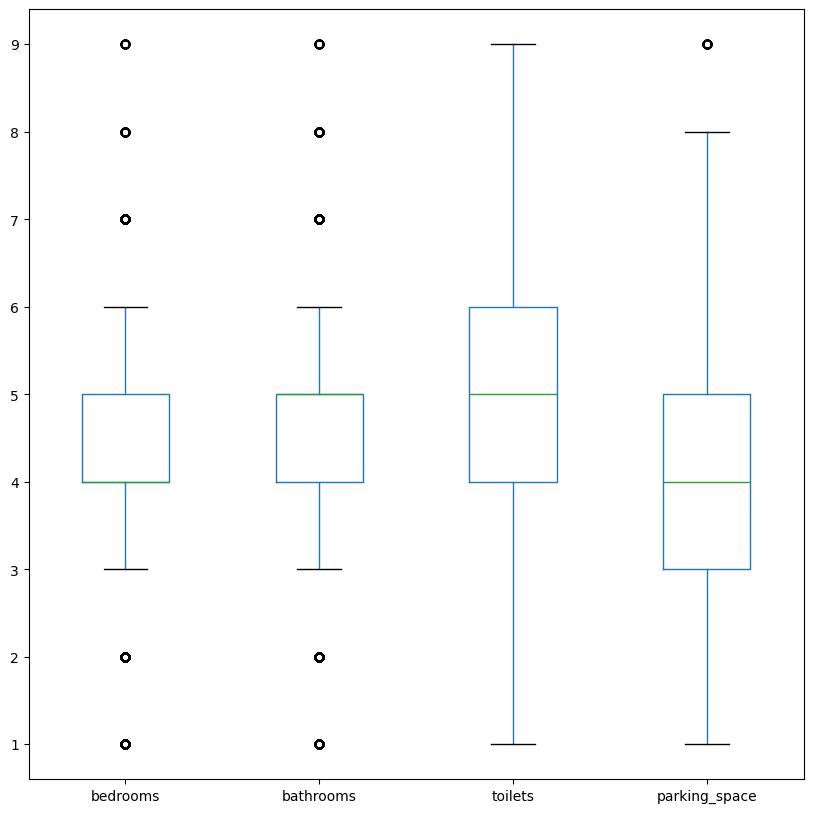

In [27]:
data.boxplot(column=num_col, figsize=(10, 10), grid=False)

In [28]:
data[data['parking_space'] > 8]

,bedrooms,bathrooms,toilets,parking_space,title,town,price
296,4.0,5.0,5.0,9.0,Detached Bungalow,Ibeju Lekki,2.700000e+07
374,4.0,5.0,5.0,9.0,Detached Duplex,Lekki,1.650000e+08
763,6.0,6.0,7.0,9.0,Detached Duplex,Lekki,3.500000e+08
966,6.0,6.0,7.0,9.0,Detached Duplex,Ikoyi,1.400000e+09
1124,5.0,5.0,6.0,9.0,Detached Duplex,Lekki,2.600000e+08
1264,6.0,5.0,6.0,9.0,Detached Bungalow,Ikorodu,1.700000e+07
1355,5.0,6.0,6.0,9.0,Detached Duplex,Lekki,7.000000e+07
1802,4.0,4.0,5.0,9.0,Terraced Duplexes,Ikoyi,1.400000e+08
1875,6.0,7.0,7.0,9.0,Detached Duplex,Ikoyi,1.400000e+09
1941,5.0,5.0,6.0,9.0,Detached Duplex,Ajah,2.400000e+08


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'toilets'}>,
        <Axes: title={'center': 'parking_space'}>]], dtype=object)

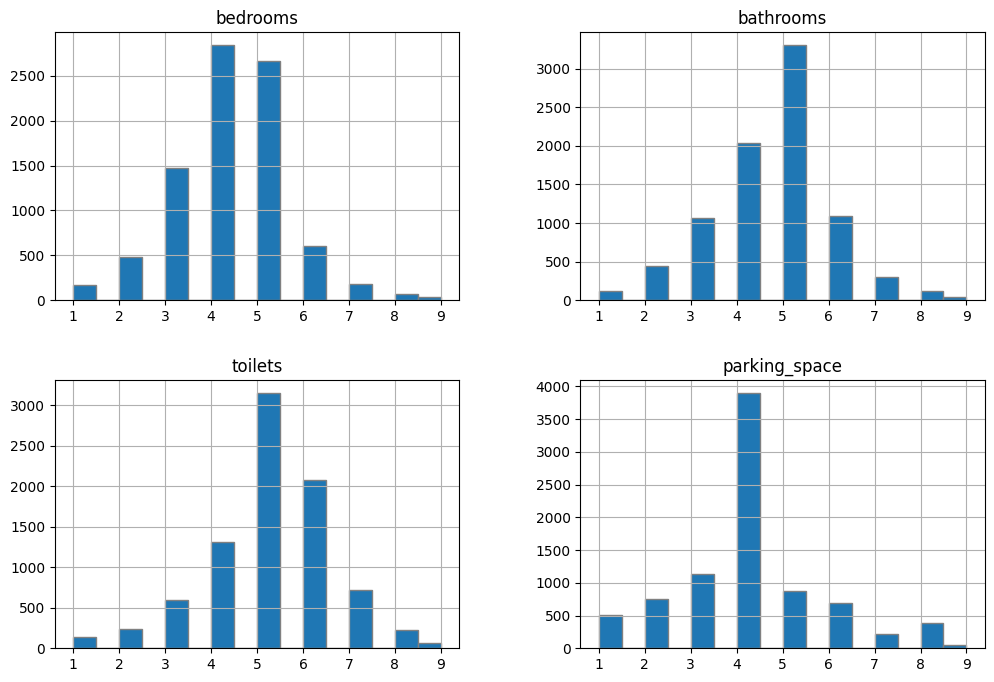

In [29]:
# Create histograms for the numerical columns in the Lagos data to visualize their distributions
data[num_col].hist(bins=16, figsize=(12, 8), edgecolor="grey")

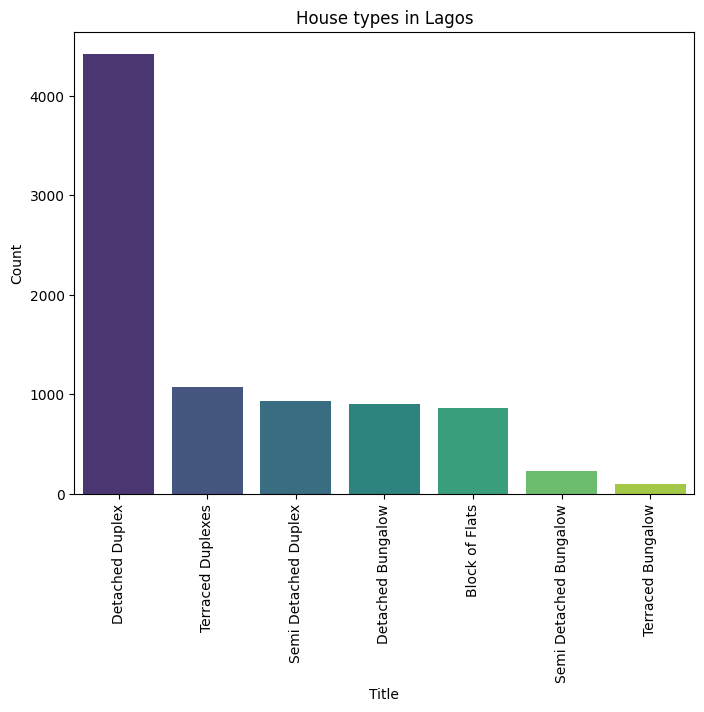

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['title'].value_counts().index, y=data['title'].value_counts().values, palette='viridis')
plt.xlabel("Title")
plt.ylabel("Count")
plt.title("House types in Lagos")
plt.xticks(rotation=90)
plt.show()

#### Target Analysis

array([[<Axes: title={'center': 'price'}>]], dtype=object)

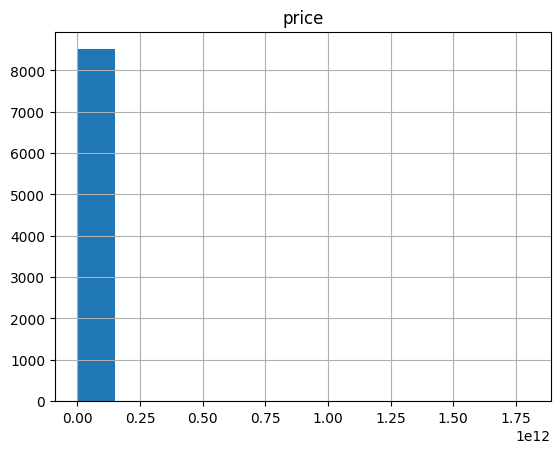

In [31]:
data[['price']].hist(bins=12)

<Axes: >

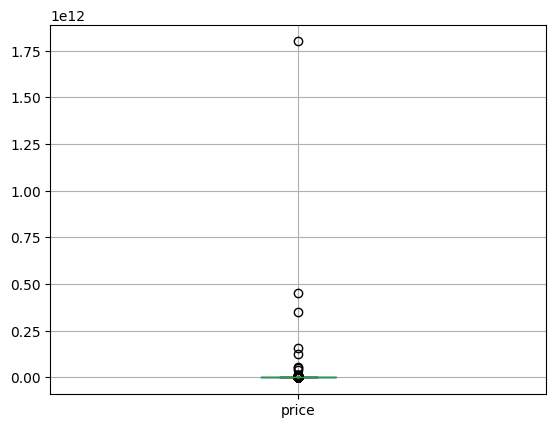

In [32]:
data[['price']].boxplot()

<Axes: >

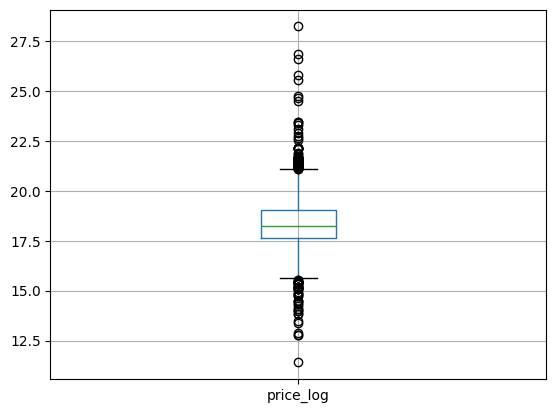

In [33]:
data["price_log"] = np.log1p(data['price'])
data[['price_log']].boxplot()

array([[<Axes: title={'center': 'price_log'}>]], dtype=object)

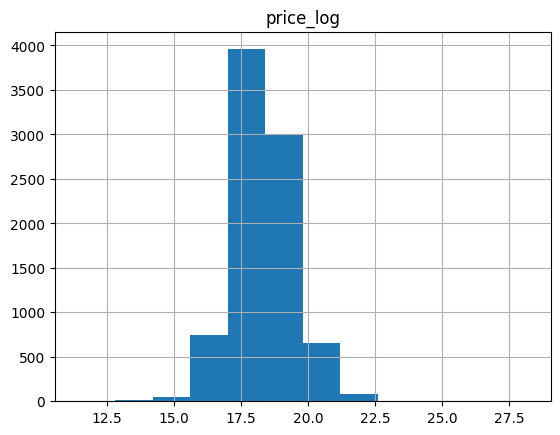

In [34]:
data[['price_log']].hist(bins=12)

<Axes: xlabel='Price_log', ylabel='Density'>

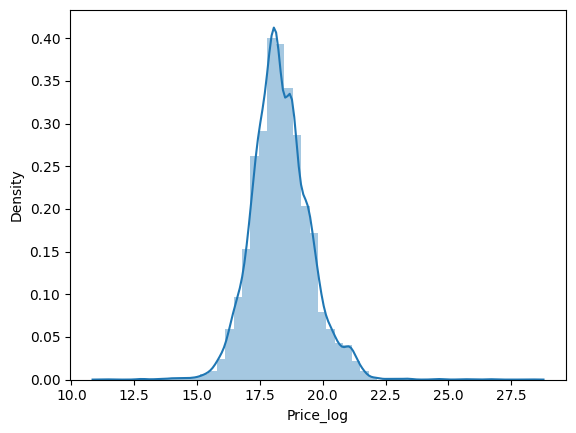

In [35]:
sns.distplot(data['price_log'], axlabel="Price_log")

### Bivariate/Multivariate Analysis

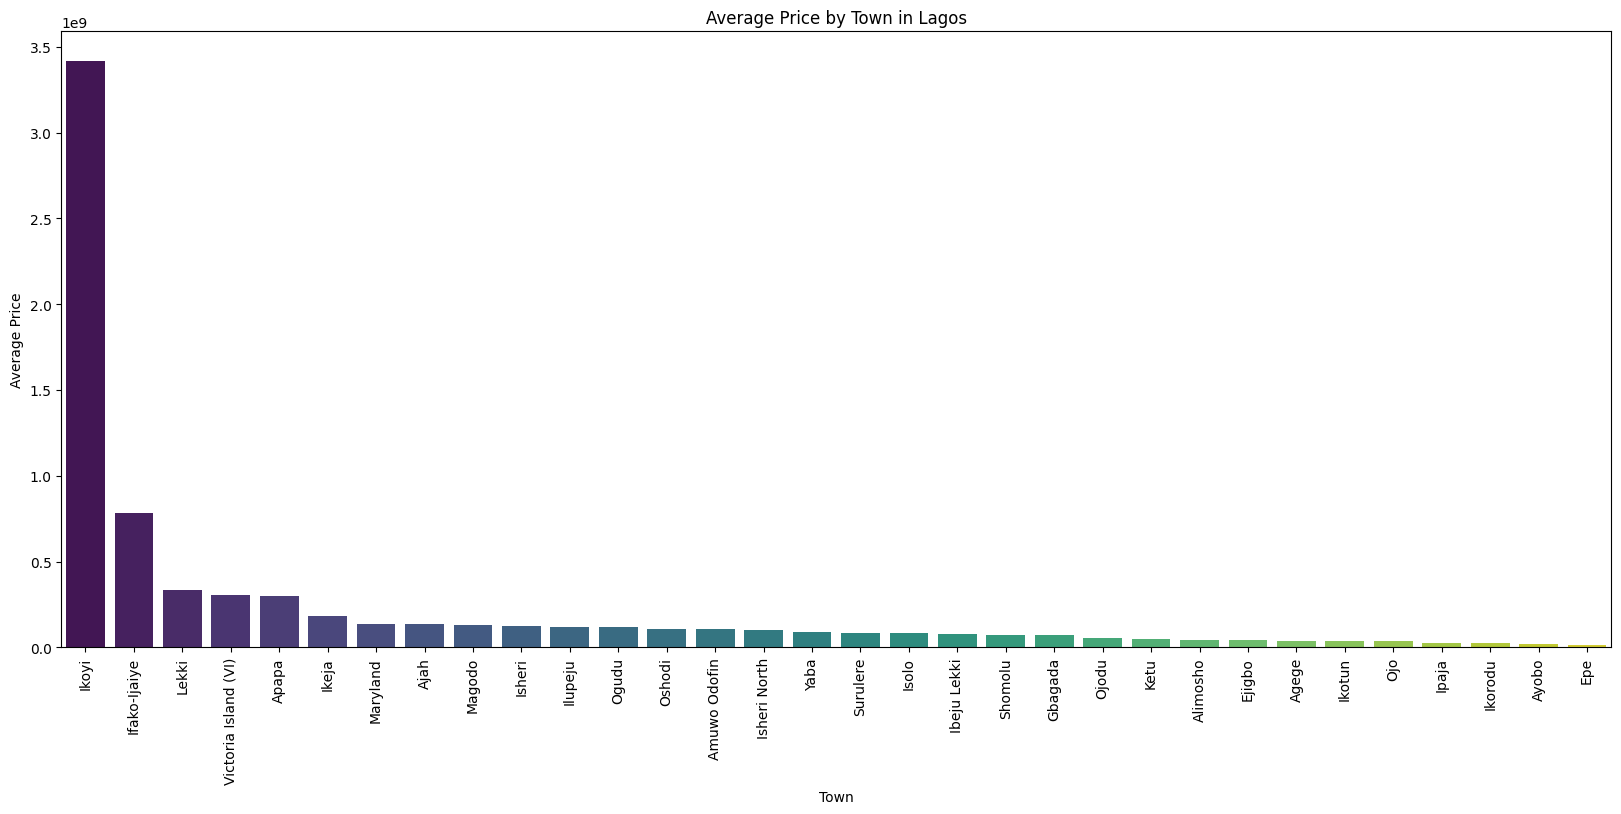

In [36]:
# Calculate the average price per town
average_price_by_town = data.groupby('town')['price'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(20, 8))
sns.barplot(x=average_price_by_town.index, y=average_price_by_town['price'], palette='viridis')
plt.xlabel("Town")
plt.ylabel("Average Price")
plt.title("Average Price by Town in Lagos")
plt.xticks(rotation=90)
plt.show()

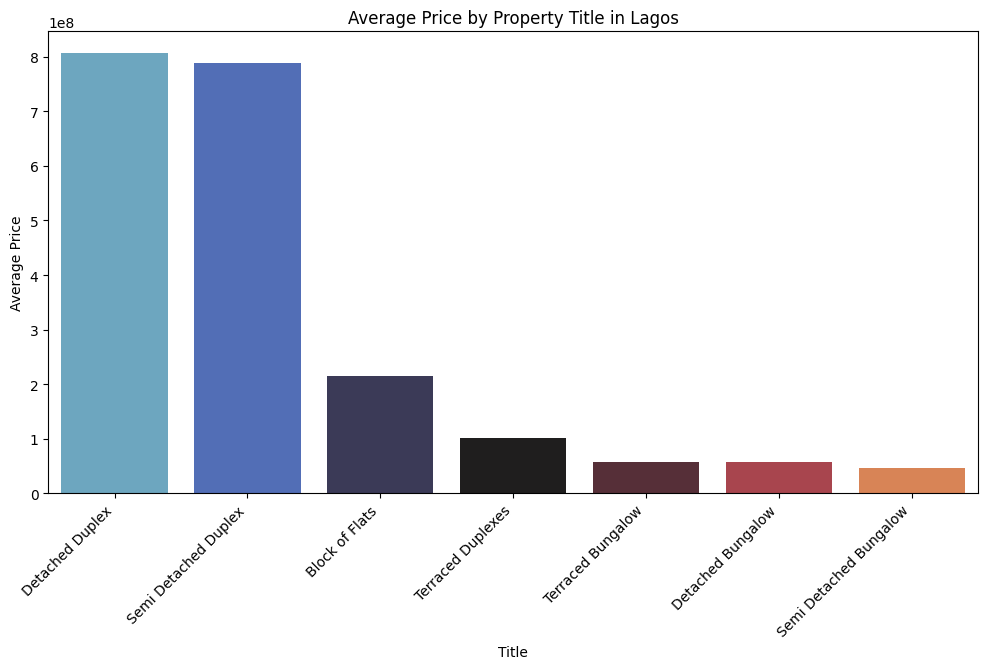

In [37]:
# Calculate the average price per property title
average_price_by_title = data.groupby('title')['price'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_title.index, y=average_price_by_title['price'], palette='icefire')
plt.xlabel("Title")
plt.ylabel("Average Price")
plt.title("Average Price by Property Title in Lagos")
plt.xticks(rotation=45, ha='right')
plt.show()

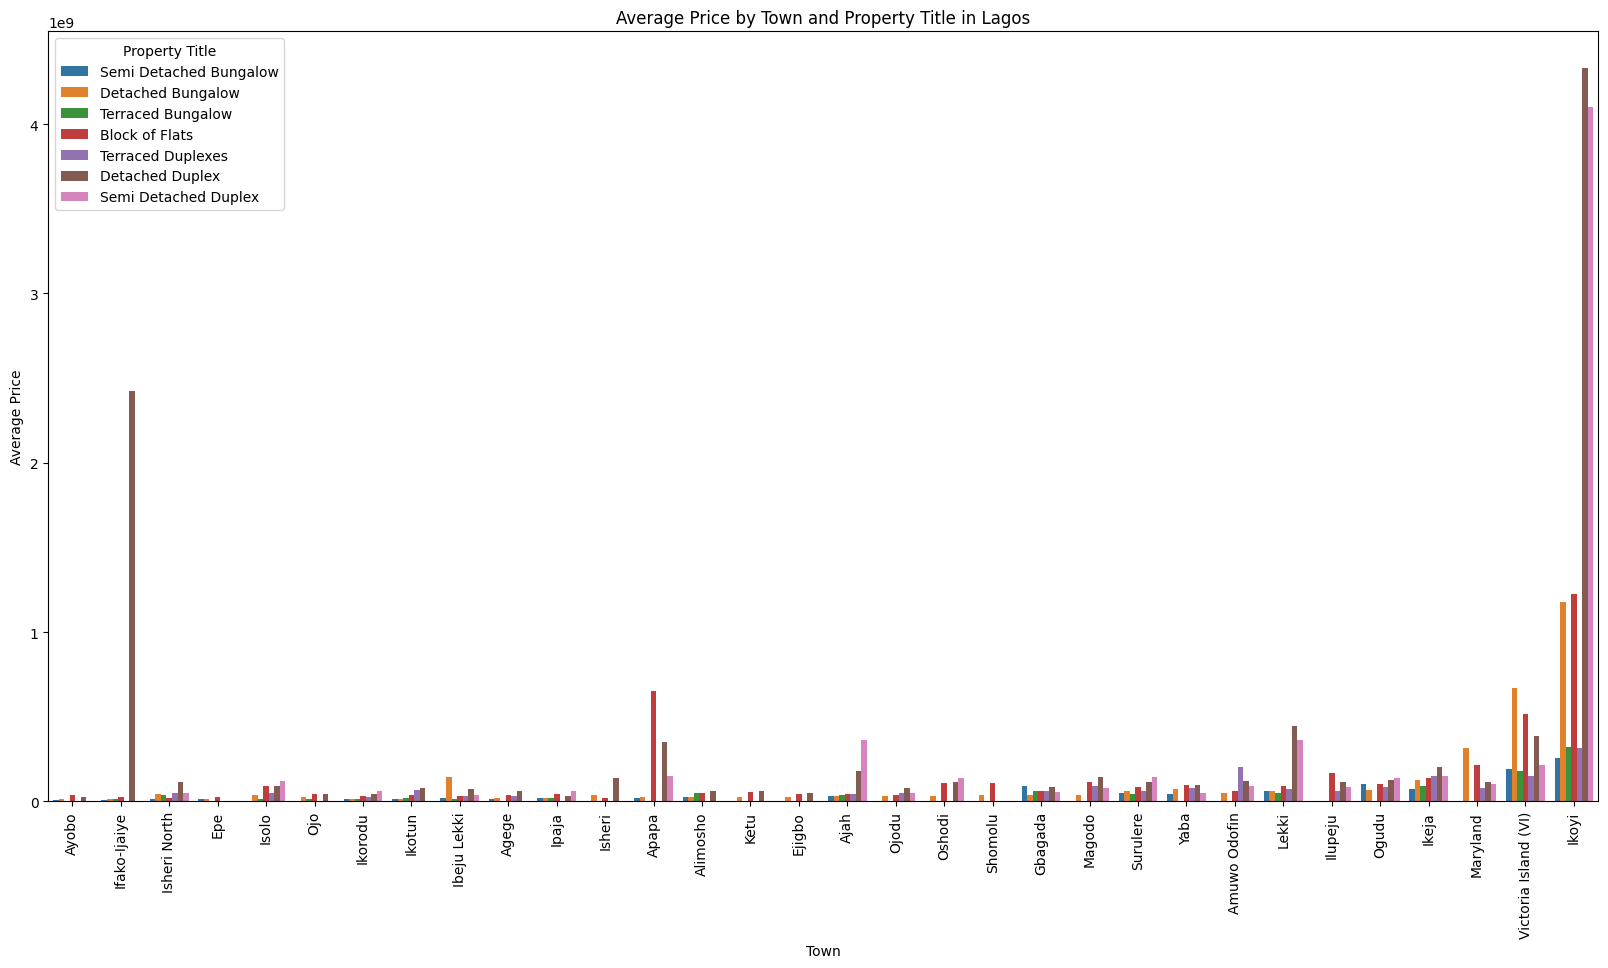

In [38]:
# Calculate the average price for each combination of town and property title
average_price_by_town_title = data.groupby(['town', 'title'])['price'].mean().sort_values().to_frame().reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(data=average_price_by_town_title, x="town", y='price', hue='title')
plt.xlabel("Town")
plt.ylabel("Average Price")
plt.title("Average Price by Town and Property Title in Lagos")
plt.xticks(rotation=90)
plt.legend(title='Property Title')
plt.show()

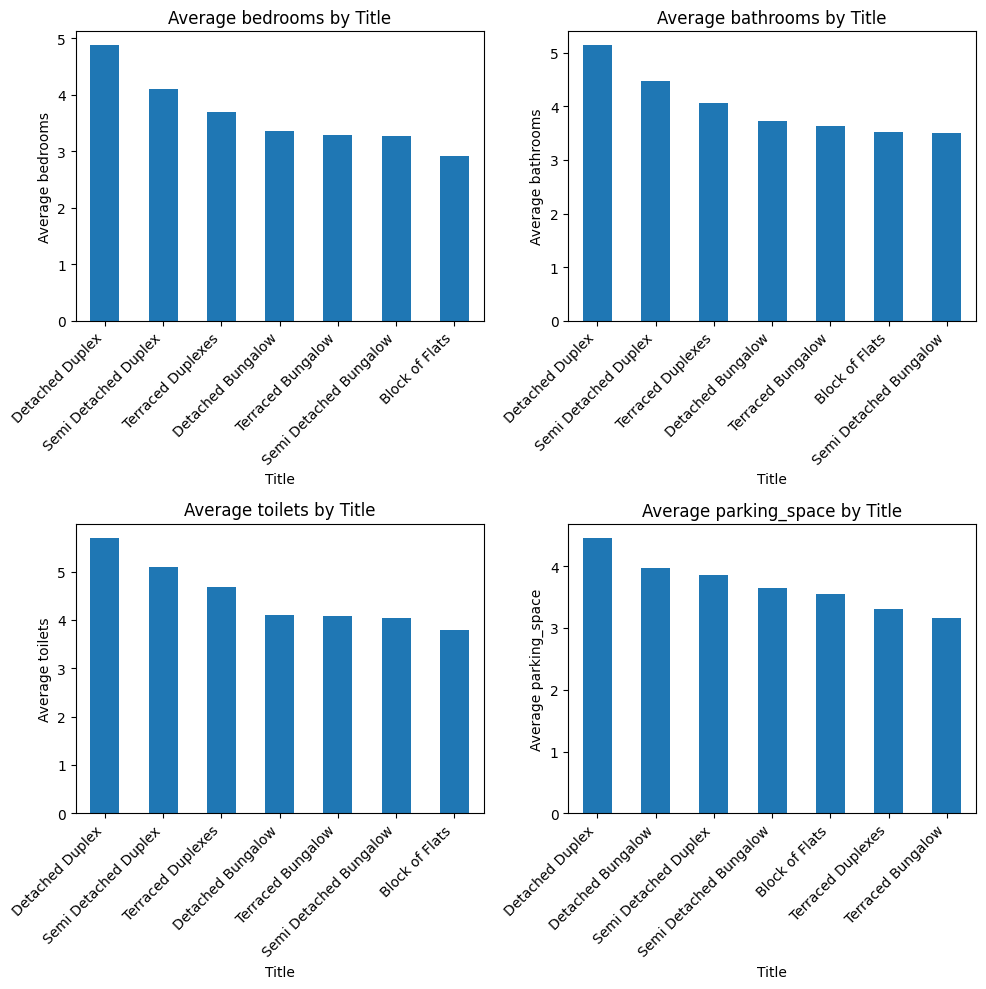

In [39]:
# Investigate the relationship between categorical features and numerical features
numerical_features = [col for col in num_col if col != "price"]

# Relationship between 'title' and numerical features using bar plots
plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    average_numerical_by_title = data.groupby('title')[col].mean().sort_values(ascending=False)
    average_numerical_by_title.plot(kind='bar')
    plt.title(f'Average {col} by Title')
    plt.xlabel('Title')
    plt.ylabel(f'Average {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

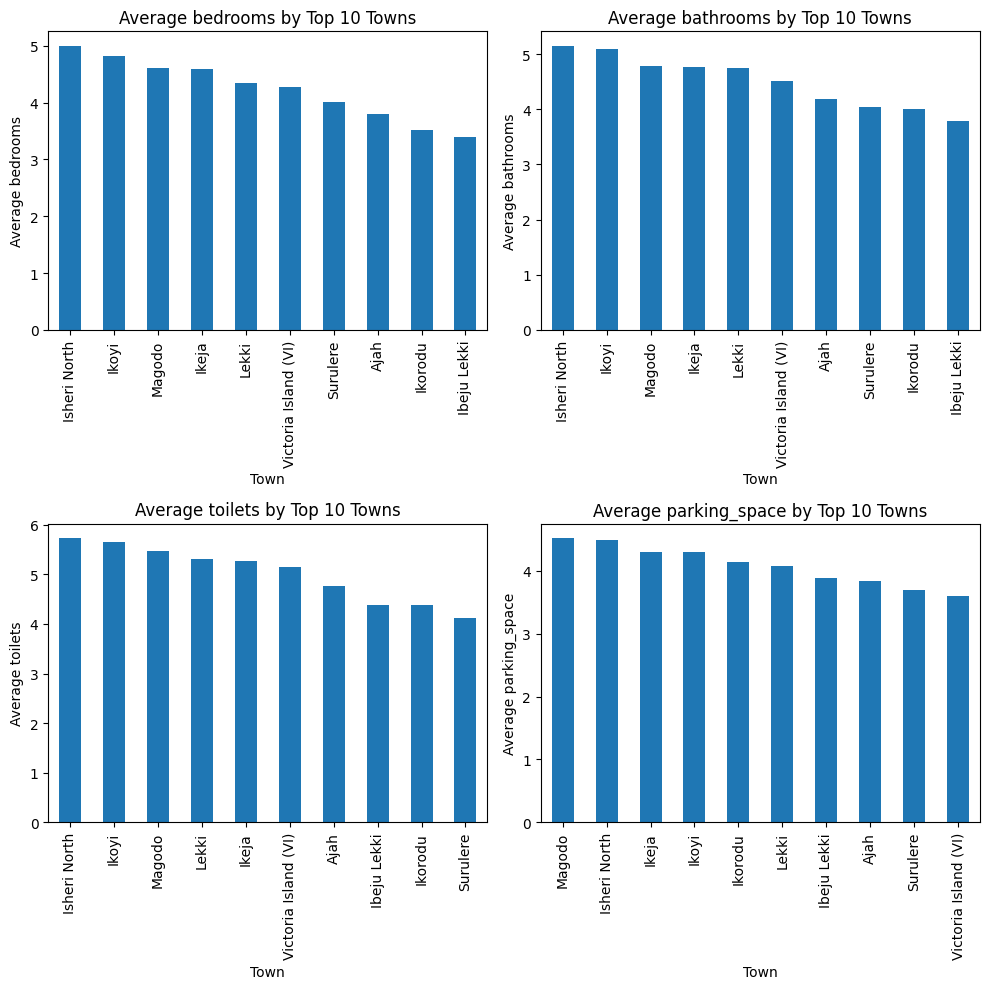

In [40]:
# Relationship between 'town' and numerical features using bar plots (select a subset of towns for readability)
# Get top 10 towns by count
top_towns = data['town'].value_counts().nlargest(10).index.tolist()
data_top_towns = data[data['town'].isin(top_towns)]

plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    average_numerical_by_town = data_top_towns.groupby('town')[col].mean().sort_values(ascending=False)
    average_numerical_by_town.plot(kind='bar')
    plt.title(f'Average {col} by Top 10 Towns')
    plt.xlabel('Town')
    plt.ylabel(f'Average {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<Axes: >

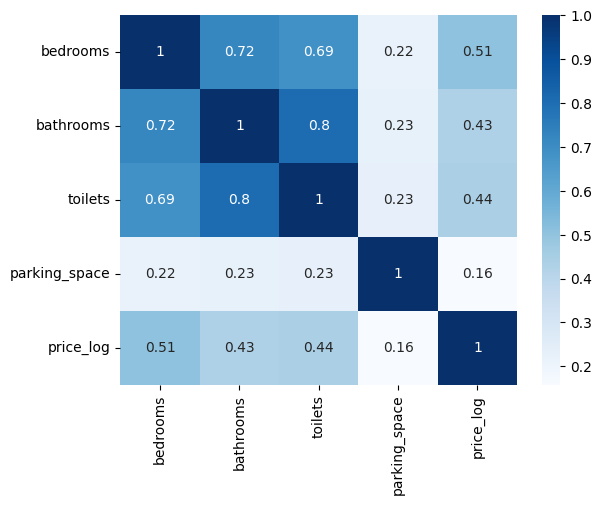

In [41]:
# Create a heatmap of the correlation matrix to visualize the relationships between numerical variables
sns.heatmap(data.drop(columns=['price']).corr(numeric_only=True), cmap="Blues", annot=True)

### Model Training

In [42]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, root_mean_squared_log_error, r2_score

In [43]:
# Define features and targets
X = data.drop(columns=["price", "price_log"])
y = data["price_log"]

In [44]:
X

,bedrooms,bathrooms,toilets,parking_space,title,town
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki
1,4.0,4.0,5.0,6.0,Detached Duplex,Ajah
2,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki
3,5.0,5.0,6.0,1.0,Detached Duplex,Lekki
4,4.0,5.0,5.0,4.0,Detached Duplex,Lekki
...,...,...,...,...,...,...
8513,6.0,5.0,6.0,5.0,Detached Duplex,Ibeju Lekki
8514,2.0,3.0,3.0,2.0,Block of Flats,Lekki
8515,5.0,6.0,6.0,8.0,Detached Duplex,Isolo
8516,3.0,4.0,4.0,5.0,Detached Duplex,Lekki


In [45]:
# Splitting the data into train and holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.shape

(6814, 6)

#### Feature Engineering

I'll be using a copy of the train data from here

In [47]:
X_train_1 = X_train.copy()

##### Numerical Features

In [48]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train_1[num_col])

StandardScaler()

In [49]:
X_train_1[num_col] = scaler.transform(X_train_1[num_col])

In [50]:
X_train_1

,bedrooms,bathrooms,toilets,parking_space,title,town
6289,0.634593,0.349999,0.677577,1.184733,Detached Duplex,Ikeja
549,0.634593,0.349999,0.677577,-0.051715,Detached Duplex,Lekki
4707,-0.984018,-1.189137,-1.524144,-0.051715,Detached Bungalow,Ikorodu
764,-0.174712,-0.419569,-0.056330,-1.288163,Detached Duplex,Lekki
6861,-0.984018,-0.419569,-0.790237,-0.051715,Terraced Bungalow,Ikorodu
...,...,...,...,...,...,...
5734,-2.602629,0.349999,-2.258051,-0.051715,Detached Duplex,Ajah
5191,1.443899,1.119566,1.411484,-0.051715,Detached Duplex,Lekki
5390,-0.984018,-0.419569,-0.790237,-0.669939,Detached Bungalow,Ibeju Lekki
860,-1.793323,-1.958705,-2.258051,-0.051715,Block of Flats,Lekki


##### Categorical features

In [51]:
# Let's encode features with low cardinality first
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cat_encoder.fit(X_train_1[['title']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [52]:
cat_encoder.transform(X_train_1[['title']])

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [53]:
cat_encoder.get_feature_names_out()

array(['title_Block of Flats', 'title_Detached Bungalow',
       'title_Detached Duplex', 'title_Semi Detached Bungalow',
       'title_Semi Detached Duplex', 'title_Terraced Bungalow',
       'title_Terraced Duplexes'], dtype=object)

In [54]:
encoded_cat = pd.DataFrame(cat_encoder.transform(X_train_1[['title']]), columns=cat_encoder.categories_, index=X_train_1.index)
encoded_cat

,Block of Flats,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,Terraced Duplexes
6289,0.0,0.0,1.0,0.0,0.0,0.0,0.0
549,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4707,0.0,1.0,0.0,0.0,0.0,0.0,0.0
764,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6861,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
5734,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_train_1 = pd.concat([X_train_1, encoded_cat], axis=1).drop("title", axis=1)

In [56]:
X_train_1

,bedrooms,bathrooms,toilets,parking_space,town,"(Block of Flats,)","(Detached Bungalow,)","(Detached Duplex,)","(Semi Detached Bungalow,)","(Semi Detached Duplex,)","(Terraced Bungalow,)","(Terraced Duplexes,)"
6289,0.634593,0.349999,0.677577,1.184733,Ikeja,0.0,0.0,1.0,0.0,0.0,0.0,0.0
549,0.634593,0.349999,0.677577,-0.051715,Lekki,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4707,-0.984018,-1.189137,-1.524144,-0.051715,Ikorodu,0.0,1.0,0.0,0.0,0.0,0.0,0.0
764,-0.174712,-0.419569,-0.056330,-1.288163,Lekki,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6861,-0.984018,-0.419569,-0.790237,-0.051715,Ikorodu,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-2.602629,0.349999,-2.258051,-0.051715,Ajah,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5191,1.443899,1.119566,1.411484,-0.051715,Lekki,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,-0.984018,-0.419569,-0.790237,-0.669939,Ibeju Lekki,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,-1.793323,-1.958705,-2.258051,-0.051715,Lekki,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Now we can encode features with high cardinality
ord_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)
X_train_1['town'] = ord_encoder.fit_transform(X_train_1[['town']])
X_train_1

,bedrooms,bathrooms,toilets,parking_space,town,"(Block of Flats,)","(Detached Bungalow,)","(Detached Duplex,)","(Semi Detached Bungalow,)","(Semi Detached Duplex,)","(Terraced Bungalow,)","(Terraced Duplexes,)"
6289,0.634593,0.349999,0.677577,1.184733,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
549,0.634593,0.349999,0.677577,-0.051715,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4707,-0.984018,-1.189137,-1.524144,-0.051715,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
764,-0.174712,-0.419569,-0.056330,-1.288163,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6861,-0.984018,-0.419569,-0.790237,-0.051715,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-2.602629,0.349999,-2.258051,-0.051715,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5191,1.443899,1.119566,1.411484,-0.051715,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5390,-0.984018,-0.419569,-0.790237,-0.669939,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
860,-1.793323,-1.958705,-2.258051,-0.051715,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Define Processing Pipeline

In [58]:
num_col

['bedrooms', 'bathrooms', 'toilets', 'parking_space']

In [59]:
column_transform = ColumnTransformer(
    [('numeric', StandardScaler(), num_col),
    ('low_card_categories', OneHotEncoder(handle_unknown='ignore'), ['title']),
    ('high_card_categories', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan), ['town']),
],
   verbose_feature_names_out=False,
)

model = LinearRegression()

pipeline = Pipeline([
    ('processing', column_transform),
    ('model', model),
])

pipeline.fit(X_train, y_train) # I'm using the original copoy of my train data here

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'toilets',
                                                   'parking_space']),
                                                 ('low_card_categories',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['title']),
                                                 ('high_card_categories',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['town'])],
                                   verbose_feature_names_out=False)),
                ('model', LinearRegression())])

In [60]:
y_pred = pipeline.predict(X_train)

In [61]:
y_pred

array([18.80492447, 18.96516837, 16.87251465, ..., 16.88197233,
       17.62983358, 18.54368196])

In [62]:
result = pd.DataFrame({"y_hat": y_train, "y_pred": y_pred})
result.head(10)

,y_hat,y_pred
6289,19.701615,18.804924
549,19.614603,18.965168
4707,15.068274,16.872515
764,18.315320,18.572228
6861,15.869634,17.232998
2304,17.034386,17.021586
5849,19.113828,18.763958
5549,15.894952,17.252292
1372,18.064006,18.155611
2988,17.727534,17.270577


In [63]:
# Use the negative mean squared log error to evaluate model performance
score = -root_mean_squared_log_error(y_train, y_pred)
print("score:", score)

score: -0.04598553394014453


In [64]:
# Test model on test set
y_test_pred = pipeline.predict(X_test)
score = root_mean_squared_log_error(y_test, y_test_pred)
print("score:", score)

score: 0.04545780395428363


#### Cross Validation

In [65]:
cv_scores = cross_validate(estimator=pipeline,
                           X=X,
                           y=y,
                           scoring="neg_root_mean_squared_log_error",
                           cv=5,
)
cv_scores

{'fit_time': array([0.01672339, 0.01777458, 0.01712584, 0.0174675 , 0.02025294]),
 'score_time': array([0.01070857, 0.00762177, 0.00797772, 0.00935483, 0.00880909]),
 'test_score': array([-0.04231822, -0.04591129, -0.04607817, -0.05007367, -0.04500619])}

In [66]:
score = -(cv_scores['test_score']).mean()
std_cv = (cv_scores['test_score'].std())
print(f"Score: {score} \nStandard deviation: {std_cv:.4f}")

Score: 0.045877509235342374 
Standard deviation: 0.0025


#### Model Selection

In [67]:
X_trans =  pipeline['processing'].fit_transform(X)

In [68]:
models = {"Linear regressor": LinearRegression(),
         "Random Forest Regressor": RandomForestRegressor(random_state=42),
         "SVR": SVR(kernel='rbf')}

for model, function in models.items():
    cv_score = cross_val_score(function, X_trans, y, cv=5, scoring="neg_root_mean_squared_log_error")
    print(f"{model}:\n  Score: {-cv_score.mean():.4f} \n  std: {cv_score.std():.4f}\n")

Linear regressor:
  Score: 0.0459 
  std: 0.0025

Random Forest Regressor:
  Score: 0.0371 
  std: 0.0029

SVR:
  Score: 0.0429 
  std: 0.0029



Hyperparameter Tuning


In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [70]:
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

regressor = RandomForestRegressor()

rand_search = RandomizedSearchCV(regressor, param_distributions=param_grid, n_iter=10,
                                 cv=5, return_train_score=True,
                                 scoring='neg_mean_squared_error')

rand_search.fit(pipeline['processing'].fit_transform(X_train), y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
rand_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [72]:
new_regressor = rand_search.best_estimator_

Based on the correlation matrix:

- `bedrooms`, `bathrooms`, and `toilets` are highly correlated with each other.
- `bathrooms` and `toilets` have a correlation of 0.8.
- `bedrooms` and `bathrooms` have a correlation of 0.72.

To avoid multicollinearity, we'll be dropping `bathrooms` and `toilets`. We're keeping `bedrooms` as it has the highest correlation with the target variable `price_log` (0.51) among these three features.

In [94]:
# Define a custom feature_name_combiner
def custom_combiner(feature, category):
    return category

In [95]:
column_transform = ColumnTransformer(
    [('numeric', StandardScaler(), ['bedrooms','parking_space']),
    ('low_card_categories', OneHotEncoder(handle_unknown='ignore', feature_name_combiner=custom_combiner), ['title']),
    ('high_card_categories', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan), ['town']),
],
   verbose_feature_names_out=False,
)

regressor = new_regressor

pipeline = Pipeline([
    ('processing', column_transform),
    ('regressor', regressor),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['bedrooms',
                                                   'parking_space']),
                                                 ('low_card_categories',
                                                  OneHotEncoder(feature_name_combiner=<function custom_combiner at 0x7cc6c785b420>,
                                                                handle_unknown='ignore'),
                                                  ['title']),
                                                 ('high_card_categories',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['town'])],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 RandomForestRegressor(max_features=6, n_estimators=30))])

In [74]:
# Test model on test set
y_pred = pipeline.predict(X_test)
score = root_mean_squared_log_error(y_test, y_pred)
print("score:", score)

score: 0.03719049575712629


In [75]:
pipeline[:-1].feature_names_in_

array(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title',
       'town'], dtype=object)

In [76]:
result = pd.DataFrame({"y_hat": np.expm1(y_test), "y_pred": np.expm1(y_pred)})
result.head(10)

,y_hat,y_pred
7497,1.300000e+08,1.487225e+08
5257,4.800000e+07,4.311171e+07
2571,7.500000e+07,8.971165e+07
1084,9.000000e+08,7.880087e+08
856,1.300000e+08,1.259668e+08
4080,1.400000e+08,9.376787e+07
2131,7.500000e+07,7.460181e+07
1385,1.000000e+08,4.009086e+08
4769,6.000000e+07,7.746938e+07
8383,7.500000e+07,6.731441e+07


### Explaining Predictions with SHAP

In [84]:
# Using SHAP violin plot
import shap

Xt = pipeline['processing'].transform(X)
explainer = shap.Explainer(pipeline['regressor'].predict, Xt)
shap_values = explainer(Xt)

# feature_names = pipeline['processing'].get_feature_names_out()

# shap_values = pipeline.predict(Xt, pred_contribs)
# shap.summary_plot()

ExactExplainer explainer: 8519it [14:52,  9.51it/s]


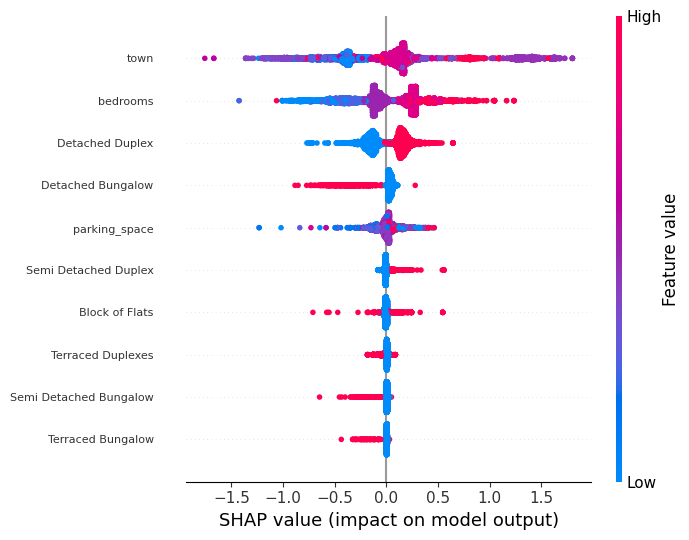

In [98]:
shapValues = shap_values.values

feature_names = pipeline['processing'].get_feature_names_out()

shap.summary_plot(shap_values=shap_values, feature_names=feature_names, show=False)
plt.yticks(fontsize=8)
plt.show()

### Saving the Pipeline

In [77]:
import joblib

In [78]:
joblib.dump(pipeline, "my_prediction_pipeline.pkl")

['my_prediction_pipeline.pkl']

In [79]:
!pip freeze > requirement.txt